In [64]:
import pandas as pd
import seaborn as sn

In [65]:
df = pd.read_csv('bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [66]:
df.shape

(13200, 7)

In [67]:
df['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [68]:
lower_limit = df['price_per_sqft'].quantile(0.001)
upper_limit = df['price_per_sqft'].quantile(0.999)

df2 = df[(df['price_per_sqft'] > lower_limit) & (df['price_per_sqft'] < upper_limit)]

df2.shape

(13172, 7)

In [69]:
mean = df2['price_per_sqft'].mean()
std = df2['price_per_sqft'].std()

upper_limit = mean + 4*std
lower_limit = mean - 4*std

df_no_outliers = df2[(df2['price_per_sqft'] > lower_limit) & (df2['price_per_sqft'] < upper_limit)]

df_no_outliers.shape

(13047, 7)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

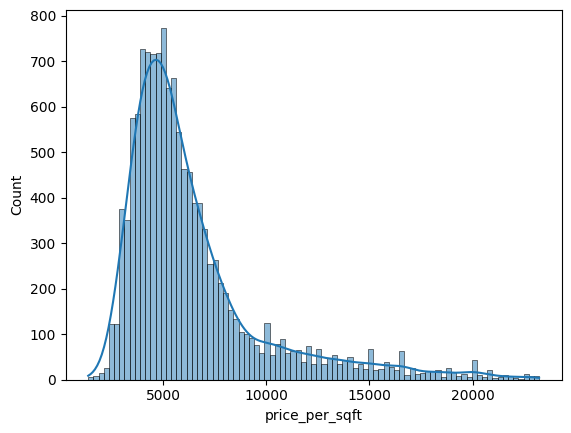

In [70]:
sn.histplot(df_no_outliers['price_per_sqft'], kde=True)

In [76]:
df2['price_per_sqft_zscore'] = (df2['price_per_sqft'] - mean) / std
df2.head()

C:\Users\Vladan\AppData\Local\Temp\ipykernel_21088\2837693123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['price_per_sqft_zscore'] = (df2['price_per_sqft'] - mean) / std


,location,size,total_sqft,bath,price,bhk,price_per_sqft,price_per_sqft_zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


In [77]:
df_no_outliers = df2[(df2['price_per_sqft_zscore'] > -4) & (df2['price_per_sqft_zscore'] < 4)]

df_no_outliers.shape

(13047, 8)

<Axes: xlabel='price_per_sqft_zscore', ylabel='Count'>

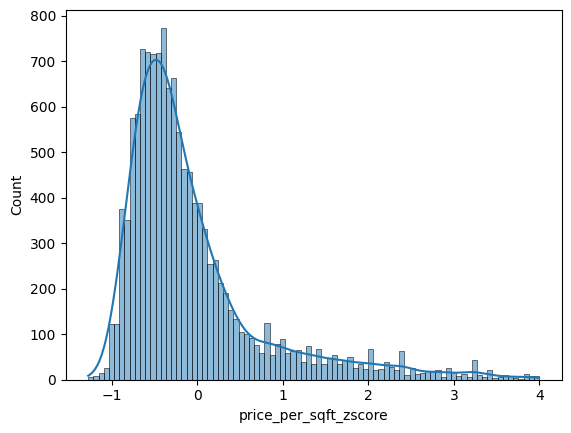

In [78]:
sn.histplot(df_no_outliers['price_per_sqft_zscore'], kde=True)